# Temporal-Difference Learning

*Temporal-Difference* Learning is both central and novel to reinforcement learning. TD is a combination of Dynamic programming (DP) and Monte Carlo ideas. Like DP, Temporal-Difference learns from raw experience without a model of the environments dynamics, and like DP, it uses past estimates to form new estimates (bootstrapping). This relationship between DP, TD and Monte Carlo methods is a running theme in the theory of reinforcement learning. 

## 6.1 TD Prediction

Like Monte Carlo, TD methods use experience to solve the prediction problem. Given some trajectories following a policy $\pi$, both methods update their estimates V for every non-terminal $S_t$ $v_{\pi}$ encountered.

Monte carlo, roughly speaking, waits until the return following the visit is known, then uses that return as the target for $V(S_t)$. Our simple every-visit Monte Calro method for nonstaionary environments is:

$$
V(S_t)\leftarrow V(S_t)+\alpha[G_t-V(S_t)]
$$

We call this method *constant-$\alpha$* MC, as it uses a constant step-size parameter $\alpha$. TD differs from this method, as in Monte Carlo, our $G_t$ is the actual return following time *t*, which requires us to wait until the end of an episode, TD differs as we only need to wait until the next time step. At time t+1, these methods immediately form a target and then make a useful update using the actual reward $R_{t+1}$, and the past estimate for $V(S_{t+1})$. The simplest TD method makes the update via:

$$
V(S_t)\leftarrow V(S_t)+\alpha [R_{t+1}+\gamma V(S_{t+1}-V(S_t))]
$$

This is done immediately on transition to state $S_{t+1}$ and receiving $R_{t+1}$. Essentially, our target for Monte Carlo updates is $G_t$, and our target for TD is $R_{t+1}+\gamma V(S_{t+1})$. This method is known as TD(0), or *one-step* TD. This is because it's a special case of TD($\lambda$) and n-step TD methods are later developed. 

It's interesting to note that $G_t$ and $R_{t+1}+\gamma V(S_{t+1})$ are mathematically the same. But in practice it's different because in Monte Carlo, $G_t$ is derived from the actual value, while in TD, we seperate it so we can use our past estimates for the subsequent state value.

Here we have TD(0) completely in procedural form:

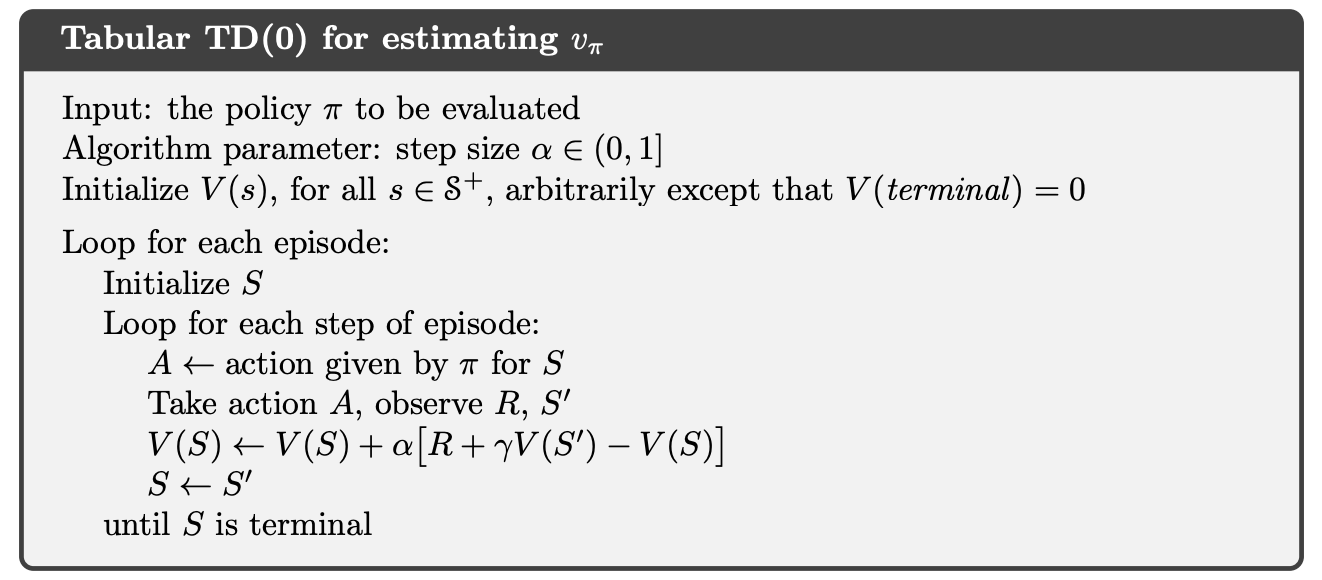

Since TD(0) bases it's updates in part on our past estimates, we can say that it's a bootstrapping method like in DP. From chapter 3 we know:

$$
v_{\pi}(s)\doteq\mathbb{E}_{\pi}[G_t|S_t=s] \ (6.3)
\\
=\mathbb{E}_{\pi}[R_{t+1}+\gamma G_{t+1}|S_t=s] \ (\text{From} (3.9))
\\
=\mathbb{E}_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s] \ (6.4)
$$

Roughly speaking, Monte Carlo methods use 6.3 as the target, and DP uses 6.4 as a target, both of which are estimates. The monte carlo method is an estimate because we use a sample return in place of the actual expected return. The DP target is also an estimate, because we don't know the true value of $v_{\pi}(S_{t+1})$, and our current estimate $V(S_{t+1})$ is used. 

TD combines both of these estimates, because it samples the expected values from 6.4 and it uses the current estimate V in place of $v_{\pi}$. So in esence, TD combines the sampling of Monte Carlo with the bootstrapping of dynamic programming. With great care and imagination we can obtain the advantages of both Monte Carlo and DP methods.

We can visualise what is happening with our updates in TD(0) using a backup diagram:

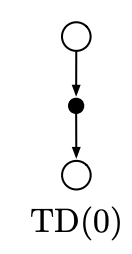

Where the value of the state node at the top of the diagram is updated based on the sample transition immediately following it below. We refer to the kind of updates done in TD and Monte Carlo as samples updates because they involve looking ahead to a sample successor state (or action-pair), then using that value of the successor and the reward along the way to compute our backed-up value, then updating the value of the original state using that. It might be a little confusing how this is the case for Monte Carlo methods because we only use the expected reward, but I'm assuming this is the case because we still use the successive, discounted, expected reward to calculate our current. 

These sample udpates differ from expected updates from Dp methods, due to them being based on a single successive sample, rather than the complete distribution of all possible successors like in DP.

An important note is that the quantity in the TD(0) update is a sort of error. It measures the differences between our current estimated value of $S_t$ and the better estimate from $R_{t+1}+\gamma V(S_{t+1})$. This quantity is known as the *TD error* and it arises in many forms throughout reinforcement learning:

$\delta_t \doteq R_{t+1}+\gamma V(S_{t+1})-V(S_t)$

The TD error describes the error in the estimate at time t+1, because our reward is not available until time t+1. It can also be said that if array V doesn't change during the episode (like in Monte Carl methods), then the Monte Carlo error can be written as a sum of TD errors:


$$
G_t-V(S_t)=R_{t+1}+\gamma G_{t+1}-V(S_t)+\gamma V(S_{t+1})-\gamma V(S_{t+1})
\\
=\delta_t + \gamma (G_{t=1}-V(S_{t+1}))
\\
=\delta_t+\gamma\delta_{t+1}\gamma^2(G_{t+2}-V(S_{t+2}))
\\
=\delta_t+\gamma \delta_{t+1}+\gamma^2\delta_{t+2}+...+\gamma^{T-t-1}\delta_{T-1}+\gamma^{T-t}(G_t-V(S_T))
\\
=\delta_t+\gamma \delta_{t+1}+\gamma^2\delta_{t+2}+....+\gamma^{T-t-1}\delta_{T-1}+\gamma^{T-t}(0-0)
\\
=\sum^{T-1}_{k=t}\gamma^{k-t}\delta_k
$$


This identity is not exact if V is updated during an episode, like in TD(0), but if the step size is small then it's approximatately this. This identity is an important part of the theory and algorithims of temporal difference learning. 

Exercise 6.1

If V changes during the episode then $G_t \approx R_{t+1} +\gamma V(S_{t+1})$ because $v(S_{t+1})\approx V(S_{t+1})$

There would be some difference between true $V_t(S_{t+1})$ and our approximate $V_t(S_{t+1})$

Could it be we need to add the sum of these differences back into our error? Like so

$$
G_t-V(S_t)=(\sum^{T-1}_{k=t}v_{\pi}-V_{\pi})+(\sum^{T-1}_{k=t}\gamma^{k-t}\delta_k)
$$


$$
G_t=R_{t+1}+\gamma G_{t+1}

\\

G_t - V_t(S_t) = R_{t+1}+\gamma G_{t+1} - V_t(S_t)

\\

G_t - V_t(S_t) = R_{t+1}+\gamma V_t(S_{t+1})-V_t(S_t)+\gamma (G_{t+1}-V_t(S_{t+1}))

$$



